In [20]:
#DATA_PATH = 'C:/Users/amityu/Gel_Sheet_Data/'
DATA_PATH = 'D:/amityu/backoffice_data/'
import matplotlib.pyplot as plt
from analysis import autocorrelation_and_structure_factor_IK_and_YA as ac
from utils import graph_utils as gu
from matplotlib.ticker import FormatStrFormatter
from matplotlib.animation import FuncAnimation
import pandas as pd
from tqdm.notebook import trange, tqdm
import numpy as np
import json
import importlib
from numpy.fft import fft2, fftshift, ifftshift
from tifffile import tifffile

mu_symbol = "\u03BC"
movie_list = ['Control', '140721', '150721', '100621', '130721_CCA60_RAW', '280523 AM100 568_1', '280523 AM100 568_2','280523 AM100 568_3','control_1_050721',
              'cca120', 'cca120_am200']

for i, m in enumerate(movie_list):
    print(i, m)

k = 7
movie = movie_list[k]
MOVIE_PATH = DATA_PATH + movie + '/'
GRAPH_PATH = 'C:/Users/amityu/Gel_Sheet_Graph/'
ADD_DATA_PATH = 'C:/Users/amityu/DataspellProjects/gel_sheets/add_data/%s/' % movie
#with open(MOVIE_PATH + 'ex_data.json', 'r') as f:
#    ex_data = json.load(f)
print('\n \nmovie {}'.format(movie))
surface = np.load(MOVIE_PATH + 'np/height.npy')
time_df = pd.read_csv(ADD_DATA_PATH + '%s_time.csv' % movie)

0 Control
1 140721
2 150721
3 100621
4 130721_CCA60_RAW
5 280523 AM100 568_1
6 280523 AM100 568_2
7 280523 AM100 568_3
8 control_1_050721
9 cca120
10 cca120_am200

 
movie 280523 AM100 568_3


In [ ]:
from scipy.io import loadmat

# mat is a dict with variable names as keys, and loaded matrices as values.
path = r'C:\Users\amityu\DataspellProjects\gel_sheets\add_data\280523 AM100 568_3\transform\\'
files = os.listdir(path)
x_trans = [loadmat(path + file)['AffineTransform_double_3_3'][9][0] for file in files]
print(np.sum(x_trans))
print(x_trans)

In [6]:
gel = np.load(MOVIE_PATH + 'np/gel_norm.npy', mmap_mode='r')

In [32]:
im1 = tifffile.imread(MOVIE_PATH + 'tiff/C1/T74_C1.tif')[:,:,0]
im2 = tifffile.imread(MOVIE_PATH + 'tiff/C1/T124_C1.tif')[:,:,0]
im1 = np.vstack((im1, np.zeros((len(im2)-len(im1), im1.shape[1]))))

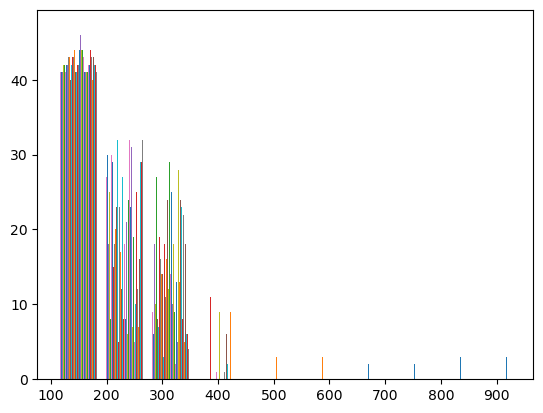

In [27]:
plt.hist(im1)
plt.show()

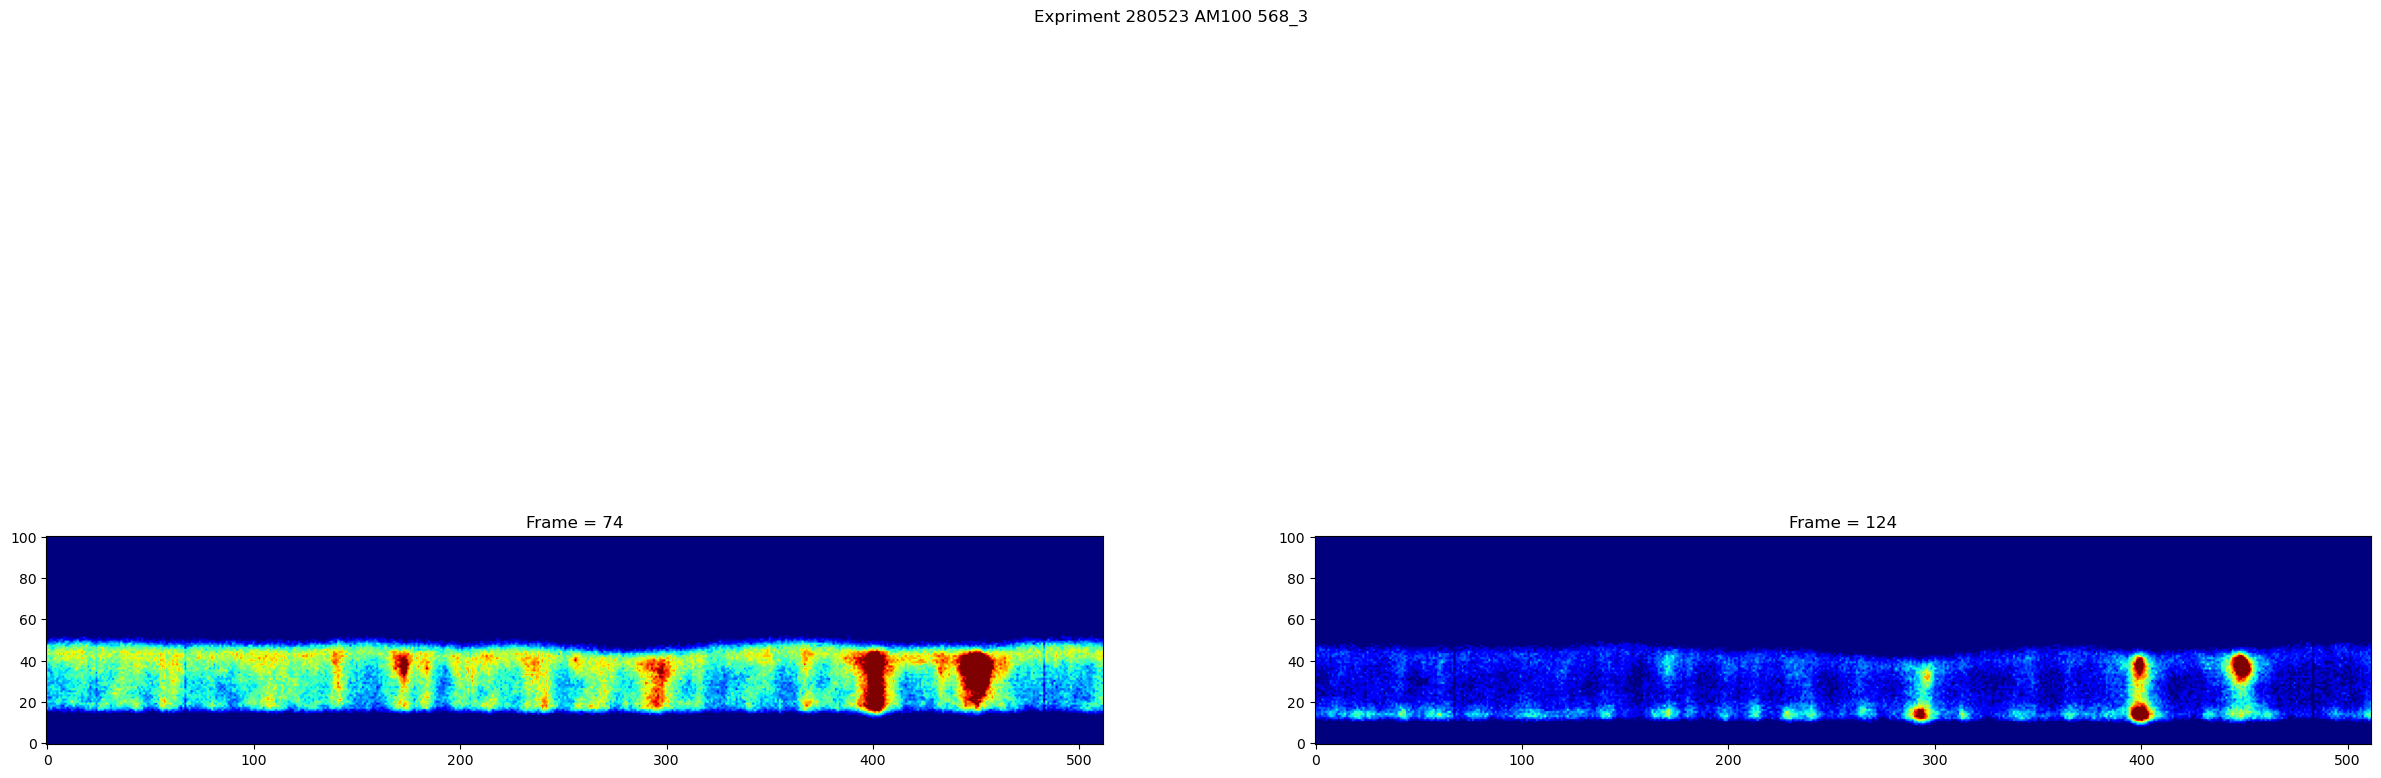

In [33]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (30,13))
ax1.imshow(im1, cmap='jet', origin = 'lower', vmin=180, vmax=380)
ax2.imshow(im2, cmap='jet', origin = 'lower', vmin=180, vmax=380)
plt.grid(False)
ax1.set_title('Frame = 74')
ax2.set_title('Frame = 124')
plt.suptitle('Expriment %s'%movie)
#flip vertically images

plt.show()
